# Minimal OpenSCM-Runner example with CICERO-SCM

In [1]:
# NBVAL_IGNORE_OUTPUT
import logging
import os.path

import matplotlib.pyplot as plt
import scmdata

import openscm_runner
from openscm_runner.run import run
from openscm_runner.adapters import CICEROSCMPY

<IPython.core.display.Javascript object>

/home/masan/gitrepos/openscm-runner/src/openscm_runner/progress.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
STDERR_INFO_HANDLER = logging.StreamHandler()
FORMATTER = logging.Formatter(
    "%(asctime)s %(name)s %(threadName)s - %(levelname)s:  %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)
STDERR_INFO_HANDLER.setFormatter(FORMATTER)

OPENSCM_RUNNER_LOGGER = logging.getLogger("openscm_runner")
OPENSCM_RUNNER_LOGGER.setLevel(logging.INFO)
OPENSCM_RUNNER_LOGGER.addHandler(STDERR_INFO_HANDLER)

In [3]:
# NBVAL_IGNORE_OUTPUT
openscm_runner.__version__

'0.10.1.dev61+g5f033b6.d20220805'

In [4]:
cicero_scm = CICEROSCMPY()
cicero_scm.get_version()

'1.0.0'

In [5]:
# NBVAL_IGNORE_OUTPUT
input_emissions = scmdata.ScmRun(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    ),
    lowercase_cols=True,
)

input_emissions.head(30)

time                                                                                                    2015-01-01  \
model   region scenario                  unit             variable                                                   
AIM/CGE World  ssp370                    Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   
                                                          Emissions|CO2|MAGICC Fossil and Industrial  35635.286298   
                                         kt HFC125/yr     Emissions|HFC125                               78.790600   
                                         kt HFC134a/yr    Emissions|HFC134a                             201.953400   
                                         kt HFC143a/yr    Emissions|HFC143a                              32.381000   
                                         kt HFC227ea/yr   Emissions|HFC227ea                              3.663300   
                                         kt HFC23/yr      Emissions|HFC23                                14.485700   
                                         kt HFC245fa/yr   Emissions|HFC245fa                             11.728500   
                                         kt HFC32/yr      Emissions|HFC32                                38.579200   
                                         kt HFC4310mee/yr Emissions|HFC4310mee                            1.151600   
                                         kt N2O/yr        Emissions|N2O                               10900.000000   
                                         Mt NH3/yr        Emissions|NH3                                  65.279703   
                                         Mt NOx/yr        Emissions|NOx                                 155.520450   
                                         Mt OC/yr         Emissions|OC                                   34.746024   
                                         kt SF6/yr        Emissions|SF6                                   8.020000   
                                         Mt SO2/yr        Emissions|Sulfur                              100.771167   
                                         Mt VOC/yr        Emissions|VOC                                 227.244819   
               ssp370-lowNTCF-aerchemmip Mt BC/yr         Emissions|BC                                    9.727424   
                                         kt C2F6/yr       Emissions|C2F6                                  1.570000   
                                         kt C6F14/yr      Emissions|C6F14                                 0.350000   
                                         kt CF4/yr        Emissions|CF4                                  10.869900   
                                         Mt CH4/yr        Emissions|CH4                                 388.072796   
                                         Mt CO/yr         Emissions|CO                                  934.349885   
                                         Mt CO2/yr        Emissions|CO2|MAGICC AFOLU                   3517.440000   

time                                                                                                    2020-01-01  \
model   region scenario                  unit             variable                                       

In [7]:
# NBVAL_IGNORE_OUTPUT
res = run(
    climate_models_cfgs={
        "CICEROSCMPY": [
            # @marit, how do you get the model to stop in 2100?
            {
                "scenario_end": input_emissions["year"].max(),
                "model_end": input_emissions["year"].max(),
                **cfg,
            }
            for cfg in [
                #             {},  # passing an empty list of an empty dict will do <@marit to write>
                {
                    "Index": 30040,
                    "pamset_udm":
                    {
                        "lambda": 0.540,
                        "akapa": 0.341,
                        "cpi": 0.556,
                        "W": 1.897,
                        "rlamdo": 16.618,
                        "beto": 3.225,
                        "mixed": 107.277,
                    },
                    "pamset_emiconc":
                    {
                        "qdirso2": -0.457,
                        "qindso2": -0.514,
                        "qbc": 0.200,
                        "qoc": -0.103,
                    }
                },
                {
                    "Index": 1,
                    "pamset_udm":
                    {
                        "lambda": 0.3925,
                        "akapa": 0.2421,
                        "cpi": 0.3745,
                        "W": 0.8172,
                        "rlamdo": 16.4599,
                        "beto": 4.4369,
                        "mixed": 35.4192,
                    },
                    "pamset_emiconc":
                    {
                        "qdirso2": -0.3428,
                        "qindso2": -0.3856,
                        "qbc": 0.1507,
                        "qoc": -0.0776,
                    }
                },
                #             {"q": np.array([0.3, 0.45]), "r0": 30.0, "lambda_global": 0.9},
                #             {"q": np.array([0.35, 0.4]), "r0": 25.0, "lambda_global": 1.1},
            ]
        ],
    },
    scenarios=input_emissions,
    output_variables=(
        "Surface Air Temperature Change",
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|CH4",
        "Effective Radiative Forcing|N2O",
        "Effective Radiative Forcing|Greenhouse Gases",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|SOx",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
    # not yet implemented
    #     out_config={"CICEROSCM": ("lambda",)}
).filter(
    year=range(1, input_emissions["year"].max() + 1)
)  # TODO: remove filter once we know how to stop the model

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

2022-08-05 15:19:39 openscm_runner.adapters.utils.cicero_utils._run_ciceroscm_parallel MainThread - INFO:  Entered _parallel_ciceroscm
2022-08-05 15:19:39 openscm_runner.adapters.utils.cicero_utils._run_ciceroscm_parallel MainThread - INFO:  Running in parallel with up to 12 workers


Parallel runs:   0%|          | 0.00/10.0 [00:00<?, ?it/s]

2022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-11 data available, using ssp2452022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-11 data available, using ssp245
2022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-12 data available, using ssp245
2022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-11 data available, using ssp245
2022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-12 data available, using ssp2452022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-113 data available, using ssp245

2022-08-05 15:19:42 openscm_runner.adapters.utils.cicero_utils.make_scenario_common MainThread - WARNING:  No CFC-113 data a

In [8]:
# NBVAL_IGNORE_OUTPUT
res.head()

time                                                                              1750-01-01  \
climate_model model region run_id scenario unit  variable                                      
CICERO-SCM-PY IMAGE World  30040  ssp119   K     Surface Air Temperature Change    -0.000991   
                                           ppm   Atmospheric Concentrations|CO2   278.037703   
                                           W/m^2 Effective Radiative Forcing       -0.017220   
                                                 Effective Radiative Forcing|CO2    0.000000   
                                                 Effective Radiative Forcing|CH4    0.000000   

time                                                                              1751-01-01  \
climate_model model region run_id scenario unit  variable                                      
CICERO-SCM-PY IMAGE World  30040  ssp119   K     Surface Air Temperature Change    -0.002477   
                                           ppm   Atmospheric Concentrations|CO2   278.072183   
                                           W/m^2 Effective Radiative Forcing       -0.016162   
                                                 Effective Radiative Forcing|CO2    0.000690   
                                                 Effective Radiative Forcing|CH4    0.000279   

time                                                                              1752-01-01  \
climate_model model region run_id scenario unit  variable                                      
CICERO-SCM-PY IMAGE World  30040  ssp119   K     Surface Air Temperature Change    -0.003106   
                                           ppm   Atmospheric Concentrations|CO2   278.104705   
                                           W/m^2 Effective Radiative Forcing       -0.014795   
                                                 Effective Radiative Forcing|CO2    0.001342   
                                                 Effective Radiative Forcing|CH4    0.000964   

time                                                                              1753-01-01  \
climate_model model region run_id scenario unit  variable                                      
CICERO-SCM-PY IMAGE World  30040  ssp119   K     Surface Air Temperature Change    -0.003481   
                                           ppm   Atmospheric Concentrations|CO2   278.135873   
                                           W/m^2 Effective Radiative Forcing       -0.013800   
                                                 Effective Radiative Forcing|CO2    0.001965   
                                                 Effective Radiative Forcing|CH4    0.001437   

time                                                                              1754-01-01  \
climate_model model region run_id scenario unit  variable                                      
CICERO-SCM-PY IMAGE World  30040  ssp119   K     Surface Air Temperature Change    -0.003731   
                                           ppm   Atmospheric Concentrations|CO2   278.166063   
                                           W/m^2 Effective Radiative Forcing       -0.013231   
                                                 Effective Radiative Forcing|CO2    0.002570   
                                                 Effective Radiative Forcing|CH4    0.001803   

time                                                                              1755-01-01  \
climate_model model region run_id scenario unit  variable                                      
CICERO-SCM-PY IMAGE World  30040  ssp119   K     Surface Air Temperature Change    -0.003882   
                                           ppm   Atmospheric Concentrations|CO2   278.195537   
                                           W/m^2 Effective Radiative Forcing       -0.012251   
                                                 Effective Radiative Forcing|CO2    0.003160   
                                                 Effective 

In [9]:
# NBVAL_IGNORE_OUTPUT
res.tail()

time                                                                                                         1750-01-01  \
climate_model model         region run_id scenario unit  variable                                                         
CICERO-SCM-PY REMIND-MAGPIE World  1      ssp585   W/m^2 Effective Radiative Forcing|Aerosols|Direct Eff...    0.014108   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.011734   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.007191   
                                                         Effective Radiative Forcing|Aerosols|Direct Effect   -0.004817   
                                                         Effective Radiative Forcing|Aerosols|Indirect E...   -0.008089   

time                                                                                                         1751-01-01  \
climate_model model         region run_id scenario unit  variable                                                         
CICERO-SCM-PY REMIND-MAGPIE World  1      ssp585   W/m^2 Effective Radiative Forcing|Aerosols|Direct Eff...    0.013978   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.011662   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.007098   
                                                         Effective Radiative Forcing|Aerosols|Direct Effect   -0.004782   
                                                         Effective Radiative Forcing|Aerosols|Indirect E...   -0.007984   

time                                                                                                         1752-01-01  \
climate_model model         region run_id scenario unit  variable                                                         
CICERO-SCM-PY REMIND-MAGPIE World  1      ssp585   W/m^2 Effective Radiative Forcing|Aerosols|Direct Eff...    0.013979   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.011675   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.007065   
                                                         Effective Radiative Forcing|Aerosols|Direct Effect   -0.004761   
                                                         Effective Radiative Forcing|Aerosols|Indirect E...   -0.007947   

time                                                                                                         1753-01-01  \
climate_model model         region run_id scenario unit  variable                                                         
CICERO-SCM-PY REMIND-MAGPIE World  1      ssp585   W/m^2 Effective Radiative Forcing|Aerosols|Direct Eff...    0.014087   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.011758   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.007105   
                                                         Effective Radiative Forcing|Aerosols|Direct Effect   -0.004775   
                                                         Effective Radiative Forcing|Aerosols|Indirect E...   -0.007992   

time                                                                                                         1754-01-01  \
climate_model model         region run_id scenario unit  variable                                                         
CICERO-SCM-PY REMIND-MAGPIE World  1      ssp585   W/m^2 Effective Radiative Forcing|Aerosols|Direct Eff...    0.014265   
                                                         Effective Radiative Forcing|Aerosols|Direct Eff...   -0.011885   
                                                         Eff

In [11]:
plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year",
)

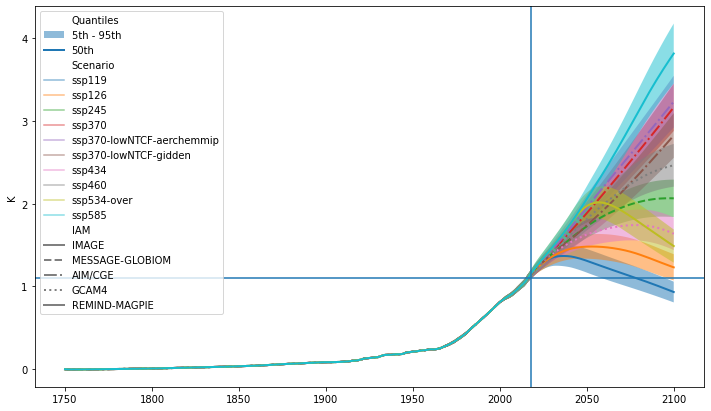

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
res.filter(variable="Surface Air Temperature Change").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axhline(1.1)
ax.axvline(2018)

(<AxesSubplot:ylabel='ppm'>,
  <matplotlib.lines.Line2D at 0x7f94f46c75c0>])

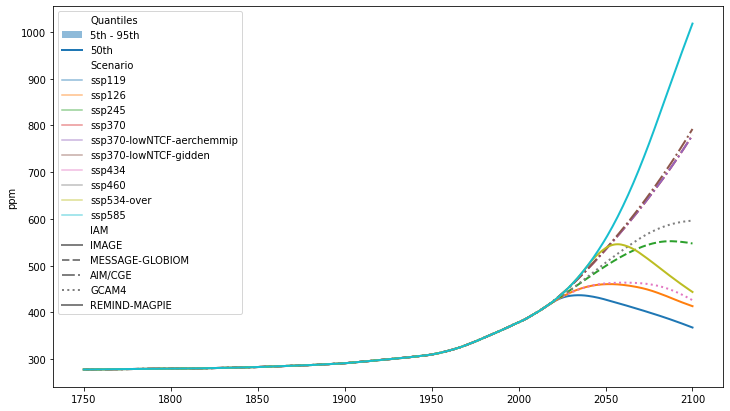

In [13]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
res.filter(variable="Atmospheric Concentrations|CO2").plumeplot(
    ax=ax, **plot_kwargs
)

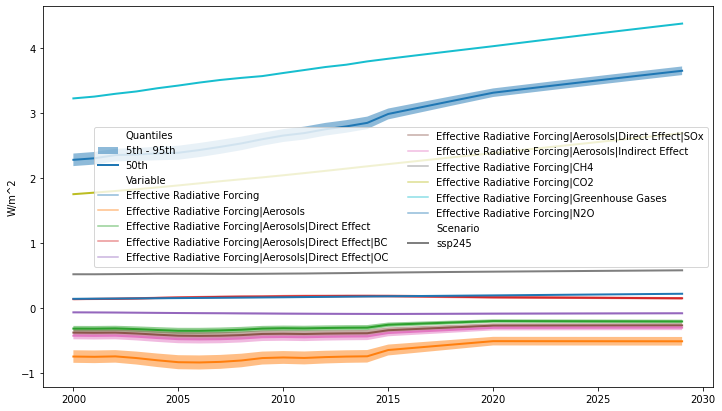

In [14]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ax, legend_items = res.filter(
    variable="Effective Radiative Forcing*",
    scenario="ssp245",
    year=range(2000, 2030),
).plumeplot(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    ax=ax,
    time_axis="year",
)
ax.legend(handles=legend_items, ncol=2, loc="center right")